In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
from IPython.display import display # Allows the use of display() for DataFrames...standard in python 3

# save model for future use
from sklearn.externals import joblib
from sklearn.externals.joblib import dump
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MaxAbsScaler
from sklearn.externals.joblib import load
from scipy.stats import boxcox
from scipy import stats
from scipy.stats import norm, skew
from mlxtend.regressor import StackingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import chi2
from time import time
from collections import defaultdict, deque
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor


import os
# Common imports
import numpy as np
import os
import pandas as pd
# Import seaborn
import seaborn as sns

# Import matplotlib
import matplotlib.pyplot as plt


# to make this notebook's output stable across runs

np.random.seed(42)

# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score, precision_score, recall_score
from random import seed, randint
from sklearn.metrics import f1_score
from scipy.stats import randint

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
import random
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from random import seed, randint
from sklearn.metrics import f1_score
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Imputer 
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix, recall_score

In [2]:
# this class is used to help with the pipeline.  
# More details on this class can found in chapter 2 of Hands-on Machine Learning with Scikit-Learn and Tensorflow
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

## II. Analysis

### Assumptions

In [3]:
my_imputer = Imputer(strategy="median")
num_folds = 3
scoring = 'neg_mean_absolute_error'
seed = 7
numpy.random.seed(seed)
trees = 10
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
scaler = MinMaxScaler(feature_range=(0, 1))
depth = 5
start = True
pca = PCA(n_components=0.8)
skb = SelectKBest()
features = []
features.append(('pca', pca))
features.append(('select_best', skb))
feature_union = FeatureUnion(features)

#algorithms
LASSO_clf = Lasso()
KNN_clf = KNeighborsRegressor()
RF_clf = RandomForestRegressor(random_state = 7, n_estimators=10)
GB_clf = XGBRegressor(n_estimators = trees, max_depth = depth)

In [4]:
train_df_2016 = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])

In [5]:
properties_2016_df = pd.read_csv("properties_2016.csv")

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
train_df_2016 = pd.merge(train_df_2016, properties_2016_df, on='parcelid', how='left')

In [7]:
print(len(properties_2016_df))

2985217


In [8]:
train_df_2017 = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])

In [9]:
properties_2017_df = pd.read_csv("properties_2017.csv")

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
train_df_2017 = pd.merge(train_df_2017, properties_2017_df, on='parcelid', how='left')

In [11]:
print(len(properties_2017_df))

2985217


In [12]:
frames = [train_df_2016, train_df_2017]

train_df = pd.concat(frames)

In [13]:
print(len(train_df))

167888


In [14]:
test_df = pd.read_csv("sample_submission.csv")

In [15]:
print(len(test_df))

2985217


In [16]:
test_df = test_df.rename(columns={"ParcelId": 'parcelid'})

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 7 columns):
parcelid    int64
201610      int64
201611      int64
201612      int64
201710      int64
201711      int64
201712      int64
dtypes: int64(7)
memory usage: 159.4 MB


In [18]:
del train_df_2016, train_df_2017 # dfs still in list
del frames   # memory release now

In [19]:
import gc
gc.collect()

52

In [20]:
properties =  pd.merge(properties_2016_df, properties_2017_df, right_index=True, left_index=True)

In [21]:
print(len(properties))

2985217


In [22]:
test_df = pd.merge(test_df, properties_2016_df, on='parcelid', how='left')

In [23]:
del properties_2016_df, properties_2017_df, properties # dfs still in list
gc.collect()

28

### Data Exploration

In [24]:
train_df_na = (train_df.isnull().sum() / len(train_df)) * 100
train_df_na = train_df_na.drop(train_df_na[train_df_na == 0].index).sort_values(ascending=False)
NA_data = pd.DataFrame({'NA_percent' :train_df_na})
NA_data_remove = NA_data[NA_data.NA_percent >= 15]
len(NA_data_remove)

33

In [25]:
columns_to_remove = []
columns_to_remove = NA_data_remove.index.values.tolist()

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 60 columns):
parcelid                        167888 non-null int64
logerror                        167888 non-null float64
transactiondate                 167888 non-null datetime64[ns]
airconditioningtypeid           53788 non-null float64
architecturalstyletypeid        468 non-null float64
basementsqft                    93 non-null float64
bathroomcnt                     167854 non-null float64
bedroomcnt                      167854 non-null float64
buildingclasstypeid             31 non-null float64
buildingqualitytypeid           107173 non-null float64
calculatedbathnbr               166056 non-null float64
decktypeid                      1272 non-null float64
finishedfloor1squarefeet        12893 non-null float64
calculatedfinishedsquarefeet    166992 non-null float64
finishedsquarefeet12            159519 non-null float64
finishedsquarefeet13            75 non-null float64
finished

In [27]:
data_cleaner = [train_df, test_df]

###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:    
    dataset.drop(columns_to_remove, axis=1, inplace = True)

In [28]:
# We use it as our only way to select categorical columns here. This is convenient, though
# a little arbitrary.
high_cardinality_cols = [cname for cname in train_df.columns if 
                                train_df[cname].nunique() >= 15 and
                                train_df[cname].dtype == "object"]

low_cardinality_cols = [cname for cname in train_df.columns if 
                                train_df[cname].nunique() < 15 and
                                train_df[cname].dtype == "object"]
numeric_cols = [cname for cname in train_df.columns if 
                                train_df[cname].dtype in ['int64', 'float64']]

my_cols = low_cardinality_cols + numeric_cols
high_cardinality_cols
#train_predictors = candidate_train_predictors[my_cols]
#test_predictors = candidate_test_predictors[my_cols]
#https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding

['propertycountylandusecode']

In [29]:
train_df[high_cardinality_cols].nunique()

propertycountylandusecode    90
dtype: int64

In [30]:
for dataset in data_cleaner:    
    dataset.drop(high_cardinality_cols, axis=1, inplace = True)

In [31]:
train_df.apply(lambda x: len(x.unique()))

parcelid                        165210
logerror                         78958
transactiondate                    616
bathroomcnt                         26
bedroomcnt                          18
calculatedbathnbr                   25
calculatedfinishedsquarefeet      5826
finishedsquarefeet12              5730
fips                                 4
fullbathcnt                         17
latitude                        126380
longitude                       126313
lotsizesquarefeet                25368
propertylandusetypeid               15
rawcensustractandblock           57812
regionidcity                       179
regionidcounty                       4
regionidzip                        391
roomcnt                             18
yearbuilt                          139
structuretaxvaluedollarcnt       96513
taxvaluedollarcnt               102171
assessmentyear                       3
landtaxvaluedollarcnt           102190
taxamount                       149916
censustractandblock      

In [32]:
train_df.groupby('assessmentyear')['assessmentyear'].count()

assessmentyear
2015.0    90275
2016.0    77579
Name: assessmentyear, dtype: int64

In [33]:
# More categorical high cardinality columns to drop.  
more_columns_to_drop = ['parcelid',
                        'censustractandblock', 'rawcensustractandblock',
                        'latitude','longitude','regionidcounty', 'assessmentyear', 'regionidzip', 'fips']
for dataset in data_cleaner:    
    dataset.drop(more_columns_to_drop, axis=1, inplace = True)

In [34]:
drop_column2 = ['transactiondate'] 
train_df.drop(drop_column2, axis=1, inplace = True)

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 16 columns):
logerror                        167888 non-null float64
bathroomcnt                     167854 non-null float64
bedroomcnt                      167854 non-null float64
calculatedbathnbr               166056 non-null float64
calculatedfinishedsquarefeet    166992 non-null float64
finishedsquarefeet12            159519 non-null float64
fullbathcnt                     166056 non-null float64
lotsizesquarefeet               149446 non-null float64
propertylandusetypeid           167854 non-null float64
regionidcity                    164579 non-null float64
roomcnt                         167854 non-null float64
yearbuilt                       166828 non-null float64
structuretaxvaluedollarcnt      167359 non-null float64
taxvaluedollarcnt               167852 non-null float64
landtaxvaluedollarcnt           167851 non-null float64
taxamount                       167843 non-null fl

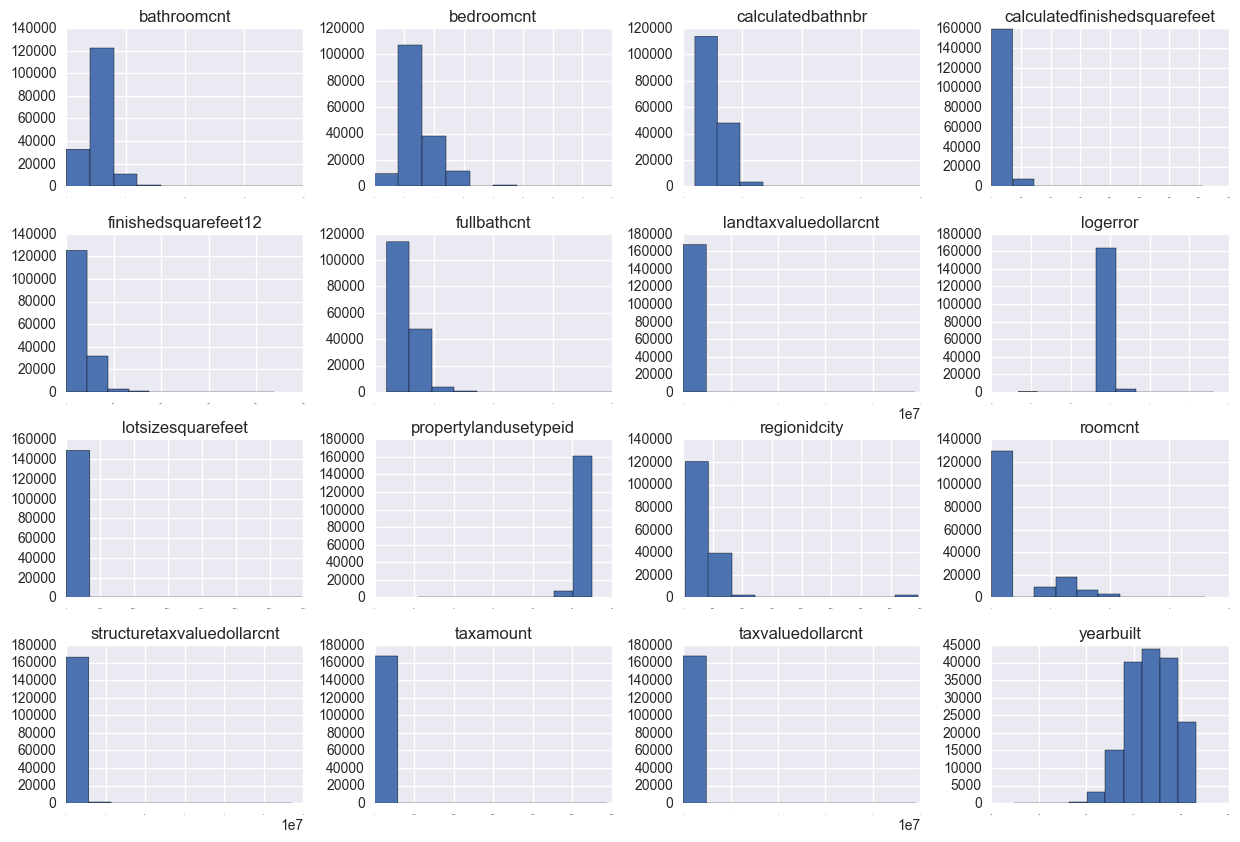

In [55]:
train_df.hist(figsize = (15,10),xlabelsize=1);

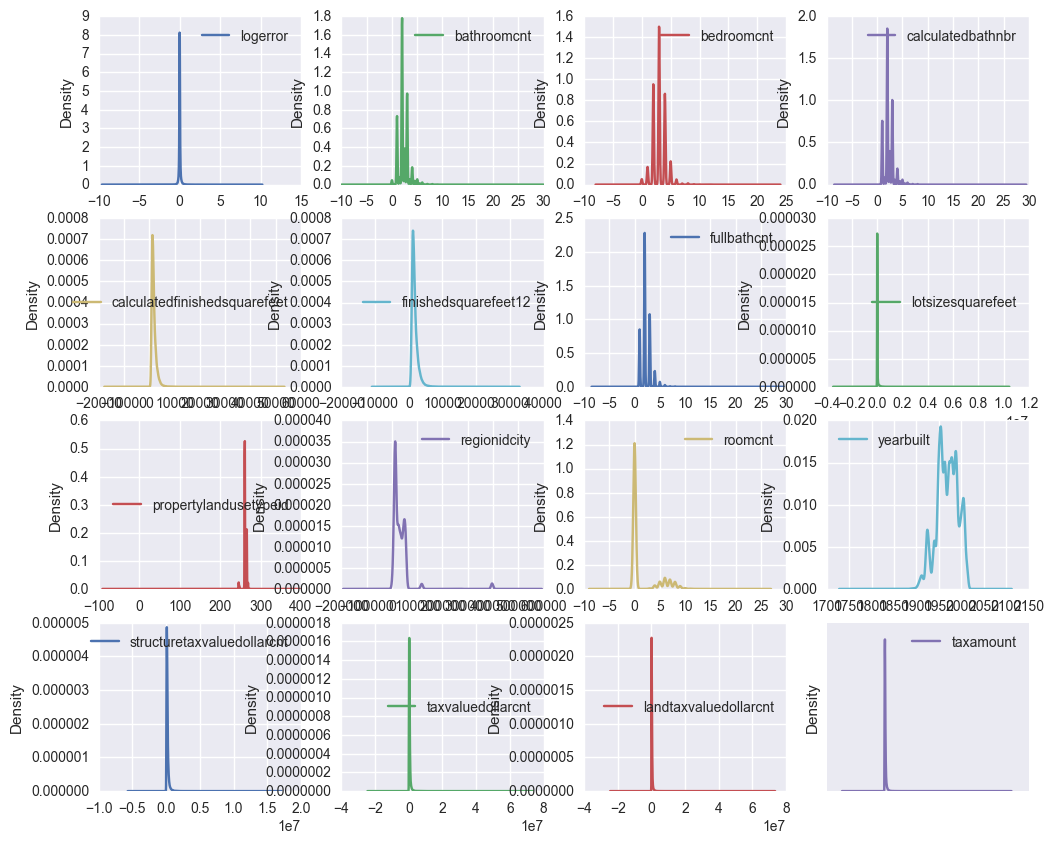

In [64]:
train_df.plot(figsize=(12, 10),kind='density', subplots=True, layout=(4,4), sharex=False)
pyplot.xticks([])
pyplot.yticks([])
pyplot.show()

#https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [65]:
train_df.skew()

logerror                         2.950871
bathroomcnt                      1.288634
bedroomcnt                       0.763777
calculatedbathnbr                1.458099
calculatedfinishedsquarefeet     3.025002
finishedsquarefeet12             2.835679
fullbathcnt                      1.521089
lotsizesquarefeet               25.804961
propertylandusetypeid          -18.351159
regionidcity                     6.425331
roomcnt                          1.547071
yearbuilt                       -0.303239
structuretaxvaluedollarcnt       9.807462
taxvaluedollarcnt               12.929249
landtaxvaluedollarcnt           18.475530
taxamount                       12.886238
dtype: float64

In [66]:
train_df['taxamount'] = train_df['taxamount'].apply(np.log)
train_df['landtaxvaluedollarcnt'] = train_df['landtaxvaluedollarcnt'].apply(np.log)
train_df['taxvaluedollarcnt'] = train_df['taxvaluedollarcnt'].apply(np.log)
train_df['structuretaxvaluedollarcnt'] = train_df['structuretaxvaluedollarcnt'].apply(np.log)
train_df['lotsizesquarefeet'] = train_df['lotsizesquarefeet'].apply(np.log)

In [67]:
test_df['taxamount'] = test_df['taxamount'].apply(np.log)
test_df['landtaxvaluedollarcnt'] = test_df['landtaxvaluedollarcnt'].apply(np.log)
test_df['taxvaluedollarcnt'] = test_df['taxvaluedollarcnt'].apply(np.log)
test_df['structuretaxvaluedollarcnt'] = test_df['structuretaxvaluedollarcnt'].apply(np.log)
test_df['lotsizesquarefeet'] = test_df['lotsizesquarefeet'].apply(np.log)

In [68]:
train_df.skew()

logerror                         2.950871
bathroomcnt                      1.288634
bedroomcnt                       0.763777
calculatedbathnbr                1.458099
calculatedfinishedsquarefeet     3.025002
finishedsquarefeet12             2.835679
fullbathcnt                      1.521089
lotsizesquarefeet                1.646681
propertylandusetypeid          -18.351159
regionidcity                     6.425331
roomcnt                          1.547071
yearbuilt                       -0.303239
structuretaxvaluedollarcnt      -0.202153
taxvaluedollarcnt               -0.219692
landtaxvaluedollarcnt           -0.356077
taxamount                        0.004331
dtype: float64

### Exploratory Visualization

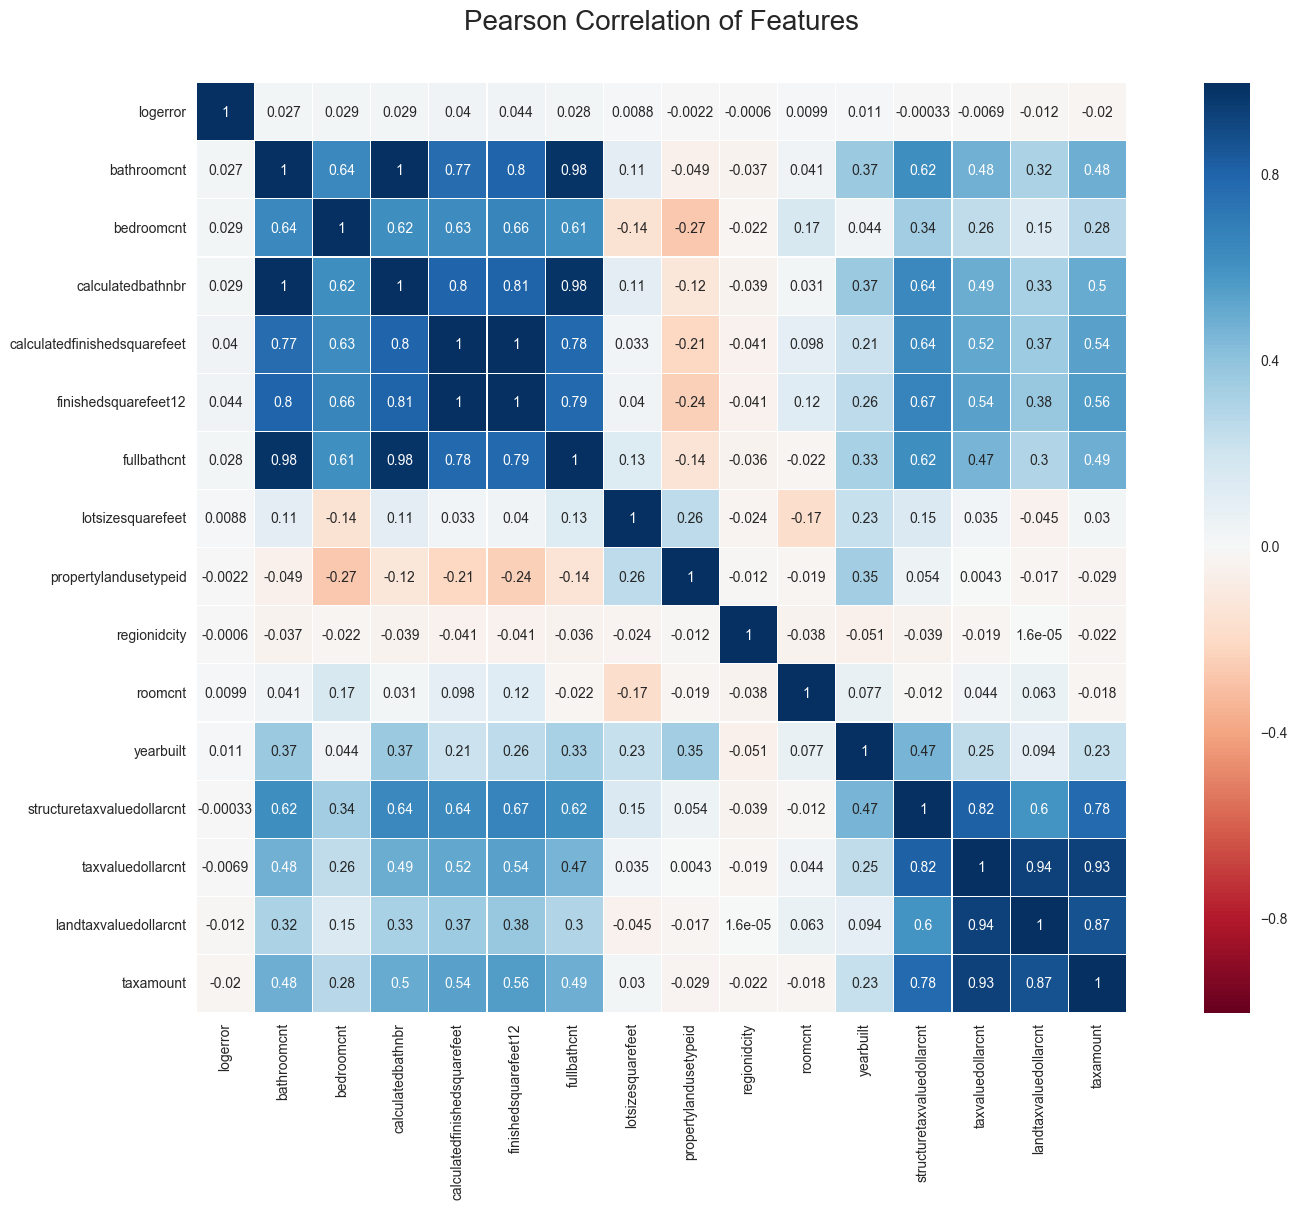

In [69]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


### Benchmark

## III. Methodology

### Data Preprocessing

In [70]:
train_df['propertylandusetypeid'] = train_df['propertylandusetypeid'].astype(str)
train_df['propertylandusetypeid']= train_df['propertylandusetypeid'].fillna('')
# Test
test_df['propertylandusetypeid'] = test_df['propertylandusetypeid'].astype(str)
test_df['propertylandusetypeid']= test_df['propertylandusetypeid'].fillna('')


In [71]:
# We will use this for a constant in binning to prevent overfitting
train_df['random_laplace_constant'] = np.random.laplace(loc=0.1, scale=0.1, size= train_df.shape[0])
test_df['random_laplace_constant'] = np.random.laplace(loc=0.1, scale=0.1, size= test_df.shape[0])

In [72]:
print(train_df.describe())

            logerror    bathroomcnt     bedroomcnt  calculatedbathnbr  \
count  167888.000000  167854.000000  167854.000000      166056.000000   
mean        0.013906       2.288265       3.041739           2.312542   
std         0.165706       1.000835       1.149134           0.977808   
min        -4.655420       0.000000       0.000000           1.000000   
25%        -0.025300       2.000000       2.000000           2.000000   
50%         0.006000       2.000000       3.000000           2.000000   
75%         0.039200       3.000000       4.000000           3.000000   
max         5.262999      20.000000      16.000000          20.000000   

       calculatedfinishedsquarefeet  finishedsquarefeet12    fullbathcnt  \
count                 166992.000000         159519.000000  166056.000000   
mean                    1778.630246           1752.326939       2.245345   
std                      940.356025            921.360898       0.964703   
min                        2.000000   

In [73]:
train_df['regionidcity'] = train_df['regionidcity'].fillna(train_df['regionidcity'].median())
train_df['yearbuilt'] = train_df['yearbuilt'].fillna(train_df['yearbuilt'].median())
train_df['calculatedfinishedsquarefeet'] = train_df['calculatedfinishedsquarefeet'].fillna(train_df['calculatedfinishedsquarefeet'].mean())
train_df['lotsizesquarefeet'] = train_df['lotsizesquarefeet'].fillna(train_df['lotsizesquarefeet'].mean())
# Test
test_df['regionidcity'] = test_df['regionidcity'].fillna(test_df['regionidcity'].median())
test_df['yearbuilt'] = test_df['yearbuilt'].fillna(test_df['yearbuilt'].median())
test_df['calculatedfinishedsquarefeet'] = test_df['calculatedfinishedsquarefeet'].fillna(test_df['calculatedfinishedsquarefeet'].mean())
test_df['lotsizesquarefeet'] = test_df['lotsizesquarefeet'].fillna(test_df['lotsizesquarefeet'].mean())


In [74]:
train_df_na = (train_df.isnull().sum() / len(train_df)) * 100
train_df_na = train_df_na.sort_values(ascending=False)
#train_df_na = train_df_na.drop(train_df_na[train_df_na == 0].index).sort_values(ascending=False)
NA_data = pd.DataFrame({'NA_percent' :train_df_na})
print(NA_data)

                              NA_percent
finishedsquarefeet12            4.984871
calculatedbathnbr               1.091204
fullbathcnt                     1.091204
structuretaxvaluedollarcnt      0.315091
taxamount                       0.026804
landtaxvaluedollarcnt           0.022039
taxvaluedollarcnt               0.021443
bathroomcnt                     0.020252
roomcnt                         0.020252
bedroomcnt                      0.020252
random_laplace_constant         0.000000
calculatedfinishedsquarefeet    0.000000
propertylandusetypeid           0.000000
lotsizesquarefeet               0.000000
regionidcity                    0.000000
yearbuilt                       0.000000
logerror                        0.000000


In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 17 columns):
logerror                        167888 non-null float64
bathroomcnt                     167854 non-null float64
bedroomcnt                      167854 non-null float64
calculatedbathnbr               166056 non-null float64
calculatedfinishedsquarefeet    167888 non-null float64
finishedsquarefeet12            159519 non-null float64
fullbathcnt                     166056 non-null float64
lotsizesquarefeet               167888 non-null float64
propertylandusetypeid           167888 non-null object
regionidcity                    167888 non-null float64
roomcnt                         167854 non-null float64
yearbuilt                       167888 non-null float64
structuretaxvaluedollarcnt      167359 non-null float64
taxvaluedollarcnt               167852 non-null float64
landtaxvaluedollarcnt           167851 non-null float64
taxamount                       167843 non-null flo

In [76]:
train_df['count_region'] =  train_df.groupby('regionidcity')['regionidcity'].transform('count')
test_df['count_region'] =  test_df.groupby('regionidcity')['regionidcity'].transform('count')

In [77]:
train_df.head()

,logerror,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,lotsizesquarefeet,propertylandusetypeid,regionidcity,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,random_laplace_constant,count_region
0,0.0276,2.0,3.0,2.0,1684.0,1684.0,2.0,8.926385,261.0,12447.0,0.0,1959.0,11.717938,12.794331,12.377569,8.815204,-0.087983,38562.0
1,-0.1684,3.5,4.0,3.5,2263.0,2263.0,3.0,8.200563,261.0,32380.0,0.0,2014.0,12.755517,13.280271,12.384516,9.225526,0.182061,1507.0
2,-0.0040,3.0,2.0,3.0,2217.0,2217.0,3.0,9.343384,261.0,47019.0,0.0,1940.0,11.034793,11.694463,10.966680,9.348752,0.086854,2154.0
3,0.0218,2.0,2.0,2.0,839.0,839.0,2.0,11.168447,266.0,12447.0,0.0,1987.0,12.052443,12.408524,11.203161,8.022484,0.159227,38562.0
4,-0.0050,2.5,4.0,2.5,2283.0,2283.0,2.0,8.699515,261.0,17686.0,8.0,1981.0,12.041045,12.982069,12.487398,8.610494,0.412309,665.0


In [78]:
train_df['supervised_ratio_region'] = train_df['count_region'] / len(train_df)
test_df['supervised_ratio_region'] = test_df['count_region'] / len(test_df)
#https://www.kdnuggets.com/2016/08/include-high-cardinality-attributes-predictive-model.html

In [79]:
# We will use this for a constant in binning to prevent overfitting
train_df['supervised_ratio_region_laplace'] = train_df['supervised_ratio_region'] + train_df['random_laplace_constant']
test_df['supervised_ratio_region_laplace'] = test_df['supervised_ratio_region']
#train_df['supervised_ratio_zip_laplace'] = train_df['supervised_ratio_zip'] + train_df['random_laplace_constant'] 

In [80]:
quantiles = [0, .25, .5, .75, 1.] 
names = ['First', 'Second', 'Third', 'Fourth']
train_df['quantile_bin_region'] = pd.qcut(train_df['supervised_ratio_region_laplace'], quantiles, 
                                       labels=names, retbins=False, precision=3)
test_df['quantile_bin_region'] = pd.qcut(test_df['supervised_ratio_region_laplace'], quantiles, 
                                       labels=names, retbins=False, precision=3)


In [81]:
names = ['(1823.999, 1953.0]', '(1953.0, 1970.0]', '(1970.0, 1987.0]', '(1987.0, 2016.0]']

train_df['yearbuilt_quantile'] = pd.qcut(train_df['yearbuilt'], quantiles,
         retbins=False, precision=3)     
test_df['yearbuilt_quantile'] = pd.qcut(test_df['yearbuilt'], quantiles, labels=names,
         retbins=False, precision=3)     

In [82]:
train_df['total_square_footage'] = train_df.calculatedfinishedsquarefeet + train_df.lotsizesquarefeet
test_df['total_square_footage'] = test_df.calculatedfinishedsquarefeet + test_df.lotsizesquarefeet

In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 23 columns):
logerror                           167888 non-null float64
bathroomcnt                        167854 non-null float64
bedroomcnt                         167854 non-null float64
calculatedbathnbr                  166056 non-null float64
calculatedfinishedsquarefeet       167888 non-null float64
finishedsquarefeet12               159519 non-null float64
fullbathcnt                        166056 non-null float64
lotsizesquarefeet                  167888 non-null float64
propertylandusetypeid              167888 non-null object
regionidcity                       167888 non-null float64
roomcnt                            167854 non-null float64
yearbuilt                          167888 non-null float64
structuretaxvaluedollarcnt         167359 non-null float64
taxvaluedollarcnt                  167852 non-null float64
landtaxvaluedollarcnt              167851 non-null float64
taxamo

In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985217 entries, 0 to 2985216
Data columns (total 28 columns):
201610                             int64
201611                             int64
201612                             int64
201710                             int64
201711                             int64
201712                             int64
bathroomcnt                        float64
bedroomcnt                         float64
calculatedbathnbr                  float64
calculatedfinishedsquarefeet       float64
finishedsquarefeet12               float64
fullbathcnt                        float64
lotsizesquarefeet                  float64
propertylandusetypeid              object
regionidcity                       float64
roomcnt                            float64
yearbuilt                          float64
structuretaxvaluedollarcnt         float64
taxvaluedollarcnt                  float64
landtaxvaluedollarcnt              float64
taxamount                          float

In [85]:
# remove categorical variables and variables used for feature engineering
data_cleaner = [train_df, test_df]

drop = []
drop = ['finishedsquarefeet12', 'lotsizesquarefeet','calculatedfinishedsquarefeet',
                       'regionidcity','random_laplace_constant','count_region',
                       'supervised_ratio_region', 'supervised_ratio_region_laplace', 'yearbuilt']
for dataset in data_cleaner:    
    dataset.drop(drop, axis=1, inplace = True)

In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 14 columns):
logerror                      167888 non-null float64
bathroomcnt                   167854 non-null float64
bedroomcnt                    167854 non-null float64
calculatedbathnbr             166056 non-null float64
fullbathcnt                   166056 non-null float64
propertylandusetypeid         167888 non-null object
roomcnt                       167854 non-null float64
structuretaxvaluedollarcnt    167359 non-null float64
taxvaluedollarcnt             167852 non-null float64
landtaxvaluedollarcnt         167851 non-null float64
taxamount                     167843 non-null float64
quantile_bin_region           167888 non-null category
yearbuilt_quantile            167888 non-null category
total_square_footage          167888 non-null float64
dtypes: category(2), float64(11), object(1)
memory usage: 17.0+ MB


In [87]:
train_df.iloc[:,0:11].columns.tolist()

['logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'fullbathcnt',
 'propertylandusetypeid',
 'roomcnt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount']

In [88]:
one_hot_encoded_train_df = pd.get_dummies(train_df)
one_hot_encoded_test_df = pd.get_dummies(test_df)
train_df, test_df = one_hot_encoded_train_df.align(one_hot_encoded_test_df,
                                                                    join='left', 
                                                                    axis=1)

### Outliers

#### Base Case

In [89]:
train_df_eda = train_df.copy()

In [90]:
# Create a Y value to predict for our training set
y = train_df_eda['logerror'].values

In [91]:
drop_column = ['logerror'] 
train_df_eda.drop(drop_column, axis=1, inplace = True)

In [92]:
train_df_imp = my_imputer.fit_transform(train_df_eda)
cv_results = cross_val_score(RF_clf, train_df_imp, y, cv=kfold, scoring=scoring)
msg = ("%f (%f)" % (cv_results.mean(), cv_results.std()))
print("Baseline Score")
print(msg)

Baseline Score
-0.085346 (0.000182)


#### Tukey Method

In [93]:
train_df_outlier = train_df.copy()

del train_df_outlier
gc.collect()

In [94]:
outlierSet = set()
outliers_remove = set()

# For each feature find the data points with extreme high or low values
for feature in train_df_outlier.loc[:,['logerror']].keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(train_df_outlier[feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(train_df_outlier[feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
#http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/

    #Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(train_df_outlier[~((train_df_outlier[feature] >= Q1 - step) & (train_df_outlier[feature] <= Q3 + step))])

    outliers_df = train_df_outlier[~((train_df_outlier[feature] >= Q1 - step) & (train_df_outlier[feature] <= Q3 + step))]
    for i in outliers_df.index.values:

        if i not in outlierSet:
                outlierSet.add(i)
        else:
            outliers_remove.add(i)

    #OPTIONAL: Select the indices for data points you wish to remove
outliers  = list(outliers_remove)
print("Outliers in more than one set: \n")
print(outliers)

#Remove the outliers, if any were specified
train_df_outlier = train_df_outlier.drop(train_df_outlier.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'logerror':


,logerror,bathroomcnt,bedroomcnt,calculatedbathnbr,fullbathcnt,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,...,propertylandusetypeid_47.0,propertylandusetypeid_nan,quantile_bin_region_First,quantile_bin_region_Second,quantile_bin_region_Third,quantile_bin_region_Fourth,"yearbuilt_quantile_(1823.999, 1953.0]","yearbuilt_quantile_(1953.0, 1970.0]","yearbuilt_quantile_(1970.0, 1987.0]","yearbuilt_quantile_(1987.0, 2016.0]"
1,-0.168400,3.5,4.0,3.5,3.0,0.0,12.755517,13.280271,12.384516,9.225526,...,0,0,0,0,1,0,0,0,0,1
5,-0.270500,4.0,4.0,4.0,4.0,0.0,13.688416,14.710762,14.264866,10.208269,...,0,0,0,1,0,0,0,0,1,0
7,0.163800,2.5,3.0,2.5,2.0,6.0,11.580584,12.631340,12.201060,8.228310,...,0,0,1,0,0,0,0,0,0,1
10,0.382500,2.0,2.0,2.0,2.0,0.0,10.922263,11.570760,10.830876,7.274958,...,0,0,0,0,0,1,0,1,0,0
24,-0.169600,2.5,2.0,2.5,2.0,0.0,11.965090,12.724241,12.093010,8.359346,...,0,0,0,0,0,1,0,0,0,1
58,-0.149700,2.0,2.0,2.0,2.0,0.0,11.347225,11.768443,10.700612,7.627695,...,0,0,0,1,0,0,1,0,0,0
61,0.211900,3.0,4.0,3.0,3.0,0.0,11.325704,12.999762,12.792141,8.668949,...,0,0,0,0,0,1,0,1,0,0
72,0.146700,2.0,2.0,2.0,2.0,0.0,10.986478,12.731736,12.539848,8.174861,...,0,0,1,0,0,0,0,0,1,0
92,-0.142700,3.0,3.0,3.0,3.0,0.0,12.144522,13.348506,12.991835,9.498715,...,0,0,0,1,0,0,0,1,0,0
93,-0.245900,2.5,3.0,2.5,2.0,7.0,11.239054,12.437149,12.077944,8.251852,...,0,0,0,0,1,0,0,1,0,0


Outliers in more than one set: 

[36867, 61446, 2056, 34825, 30730, 57356, 69559, 22542, 49167, 70992, 73048, 46919, 53267, 20500, 6165, 47128, 69657, 16411, 28700, 22560, 73584, 28706, 71811, 57382, 32807, 24688, 4139, 65202, 48477, 22576, 49160, 34867, 57396, 72713, 8248, 32825, 41018, 18493, 6207, 55360, 50535, 61509, 45127, 59404, 6219, 43085, 16464, 60770, 69646, 14424, 75866, 12379, 60697, 4189, 26981, 96, 2145, 75973, 54971, 39013, 43114, 8299, 71788, 39023, 10352, 20158, 20599, 53268, 57561, 123, 22652, 32106, 39039, 30848, 72236, 34947, 70151, 58935, 61804, 8330, 76823, 66925, 4241, 26770, 12435, 49300, 26308, 24730, 2203, 65241, 34494, 158, 12447, 43564, 14023, 51373, 10415, 24753, 63667, 56009, 30905, 62746, 47293, 71872, 37058, 31094, 41161, 69836, 61645, 28878, 43384, 74787, 59086, 59607, 4312, 43225, 35034, 22747, 71900, 14557, 6367, 67811, 12516, 30950, 24807, 4476, 57383, 18669, 51438, 71919, 49875, 11581, 67625, 59645, 59646, 61696, 37248, 45318, 4361, 43274, 69901, 49

In [95]:
# Create a Y value to predict for our training set
y_outlier = train_df_outlier['logerror'].values

In [96]:
len(y_outlier)

165676

In [97]:
drop_column = ['logerror'] 
train_df_outlier.drop(drop_column, axis=1, inplace = True)

In [98]:
train_df_outlier = my_imputer.fit_transform(train_df_outlier)
cv_results = cross_val_score(RF_clf, train_df_outlier, y_outlier, cv=kfold, scoring=scoring)
msg = ("%f (%f)" % (cv_results.mean(), cv_results.std()))
print("Score Outliers Removed")
print(msg)

Score Outliers Removed
-0.080744 (0.000207)


#### Final Cleaned Set

In [99]:
drop_column = ['logerror'] 
train_df.drop(drop_column, axis=1, inplace = True)

In [100]:
y = y_outlier

In [101]:
col = []

In [102]:
col = list(train_df.columns.values)

In [103]:
col

['bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'fullbathcnt',
 'roomcnt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 u'total_square_footage',
 'propertylandusetypeid_246.0',
 'propertylandusetypeid_247.0',
 'propertylandusetypeid_248.0',
 'propertylandusetypeid_260.0',
 'propertylandusetypeid_261.0',
 'propertylandusetypeid_263.0',
 'propertylandusetypeid_264.0',
 'propertylandusetypeid_265.0',
 'propertylandusetypeid_266.0',
 'propertylandusetypeid_267.0',
 'propertylandusetypeid_269.0',
 'propertylandusetypeid_275.0',
 'propertylandusetypeid_31.0',
 'propertylandusetypeid_47.0',
 'propertylandusetypeid_nan',
 u'quantile_bin_region_First',
 u'quantile_bin_region_Second',
 u'quantile_bin_region_Third',
 u'quantile_bin_region_Fourth',
 'yearbuilt_quantile_(1823.999, 1953.0]',
 'yearbuilt_quantile_(1953.0, 1970.0]',
 'yearbuilt_quantile_(1970.0, 1987.0]',
 'yearbuilt_quantile_(1987.0, 2016.0]']

In [104]:
train_df_outlier = pd.DataFrame(train_df_outlier,columns = col)

In [105]:
train_df = train_df_outlier.copy()

In [106]:
train_df_ohe_bins_no_categoricals = train_df.iloc[:,0:10]
train_df_ohe_bins_no_categoricals = my_imputer.fit_transform(train_df_ohe_bins_no_categoricals)
cv_results = cross_val_score(RF_clf, train_df_ohe_bins_no_categoricals, y, cv=kfold, scoring=scoring)
msg = ("%f (%f)" % (cv_results.mean(), cv_results.std()))
print("Score without Categoricals")
print(msg)

Score without Categoricals
-0.080820 (0.000366)


In [107]:
train_df_ohe_bins = my_imputer.fit_transform(train_df)
cv_results = cross_val_score(RF_clf, train_df_ohe_bins, y, cv=kfold, scoring=scoring)
msg = ("%f (%f)" % (cv_results.mean(), cv_results.std()))
print("Score with Categoricals")
print(msg)

Score with Categoricals
-0.080744 (0.000207)


In [108]:
del train_df_outlier
gc.collect()

420

### Create Polynomial Features

In [109]:
train_df_numeric_imputed = my_imputer.fit_transform(train_df.iloc[:,0:10])
train_df_numeric_imputed = pd.DataFrame(train_df_numeric_imputed, columns = train_df.iloc[:,0:10].columns)

#test_df_numeric_imputed = my_imputer.transform(test_df.select_dtypes(exclude=['uint8'])) 
#test_df_numeric_imputed = pd.DataFrame(test_df_numeric_imputed, columns = test_df.select_dtypes(exclude=['uint8']).columns)


In [110]:
def PolynomialFeatures_labeled(input_df,power):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 

    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)

    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe   
    '''
    poly = PolynomialFeatures(power, interaction_only = True, include_bias=True)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Target Constant"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df
#http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [111]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

In [112]:
train_df_poly = PolynomialFeatures_labeled(train_df_numeric_imputed, 2)

In [113]:
train_df_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165676 entries, 0 to 165675
Data columns (total 56 columns):
Target Constant                                           165676 non-null float64
bathroomcnt^1                                             165676 non-null float64
bedroomcnt^1                                              165676 non-null float64
calculatedbathnbr^1                                       165676 non-null float64
fullbathcnt^1                                             165676 non-null float64
roomcnt^1                                                 165676 non-null float64
structuretaxvaluedollarcnt^1                              165676 non-null float64
taxvaluedollarcnt^1                                       165676 non-null float64
landtaxvaluedollarcnt^1                                   165676 non-null float64
taxamount^1                                               165676 non-null float64
total_square_footage^1                                    165676 non-

test_df_poly = PolynomialFeatures_labeled(test_df_numeric_imputed, 2)

test_df_poly.info()

In [114]:
train_df_poly = pd.merge(train_df_poly,train_df.iloc[:,10:], right_index=True, left_index=True)
#https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/

In [115]:
cv_results = cross_val_score(RF_clf, train_df_poly, y, cv=kfold, scoring=scoring)
msg = ("%f (%f)" % (cv_results.mean(), cv_results.std()))
print("Score with Categoricals & Polynomials")
print(msg)

Score with Categoricals & Polynomials
-0.081697 (0.000090)


In [116]:
del train_df_poly
gc.collect()

895

In [117]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.33, random_state=42, shuffle = True)

In [118]:
#pipeline
num_attribs = list(X_train)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        #('imputer', my_imputer),
        ('std_scaler', scaler)
         ])
X_train_prepared = num_pipeline.fit_transform(X_train, y_train)
X_train_prepared = pd.DataFrame(X_train_prepared, columns = X_train.columns)

In [119]:
features = len(X_train.iloc[1])
print(features)

33


In [120]:
feature_dictionary = defaultdict(deque)

### Feature Selection

In [121]:
def train_predict(learner, columns, name):
    '''This function outputs a dictionary to show scores of algorithm during feature selection'''
    results = defaultdict(deque)
    results['Description'] = name
        
    estimators = []
    estimators.append(('selector', DataFrameSelector(columns)))
    estimators.append(('imputer', my_imputer))
    estimators.append(('std_scaler', scaler))
    
    pipeline = Pipeline(estimators)
    X_train_pipeline = pipeline.fit_transform(X_train[columns], y_train)
    X_test_pipeline = pipeline.transform(X_test[columns])
     
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train_pipeline, y_train)
    end = time() # Get end time

    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    start = time() # Get start time
    predictions_test = learner.predict(X_test_pipeline)
    predictions_train = learner.predict(X_train_pipeline)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first
    results['mae_train'] = mean_absolute_error(y_train, predictions_train)
        # TODO: Compute accuracy on test set
    results['mae_test'] =  mean_absolute_error(y_test, predictions_test)
    
    #Return the results
    print(results)
    for key, value in results.items():
        feature_dictionary[key].append(value)
    feature_df = pd.DataFrame.from_dict(feature_dictionary, orient='columns', dtype='float64')  
    return feature_df
    

In [122]:
X_train_all_columns = X_train.columns.tolist()

In [123]:
train_predict(RF_clf, X_train_all_columns,'base_case')

defaultdict(<type 'collections.deque'>, {u'train_time': 19.766000032424927, u'pred_time': 0.7990000247955322, u'Description': u'base_case', u'mae_test': 0.081161386525463355, u'mae_train': 0.032606126338710018})


,Description,mae_test,mae_train,pred_time,train_time
0,base_case,0.081161,0.032606,0.799,19.766


### Select K Best

In [124]:
#pipeline
num_attribs = list(train_df)

num_pipeline = Pipeline([
        #('selector', DataFrameSelector(num_attribs)),
        #('imputer', Imputer(strategy="median")),
        #('std_scaler', scaler),        
        ('KBest', SelectKBest(k = 10)),
        #('pca', PCA(n_components = 5)),
        ('reg', RF_clf)
         ])
param_distribs= dict(KBest__k = randint(low=1, high=len(X_train.iloc[1])))
rnd_search = RandomizedSearchCV(num_pipeline, param_distributions=param_distribs,
                                n_iter=3, scoring=scoring, random_state=42)

In [125]:
rnd_search_fit = rnd_search.fit(X_train_prepared, y_train)

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [23 24] are constant.
  UserWarning)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [126]:
print(rnd_search_fit.best_score_)
#print(r_search_pca_skb.best_estimator_)
print(rnd_search_fit.best_params_)


-0.0799904607455
{'KBest__k': 20}


In [127]:
skb = SelectKBest(k=20)

In [128]:
skb.fit_transform(X_train_prepared, y_train)

array([[ 0.1       ,  0.0625    ,  0.05263158, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.15      ,  0.1875    ,  0.10526316, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2       ,  0.25      ,  0.15789474, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.075     ,  0.125     ,  0.02631579, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1       ,  0.1875    ,  0.05263158, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1       ,  0.125     ,  0.05263158, ...,  0.        ,
         0.        ,  0.        ]])

In [129]:
mask = skb.get_support()
skb_col = X_train_prepared.columns[mask].tolist()

In [130]:
len(skb_col)

20

In [131]:
train_predict(RF_clf, skb_col,'skb_pipeline')

defaultdict(<type 'collections.deque'>, {u'train_time': 16.40400004386902, u'pred_time': 0.7769999504089355, u'Description': u'skb_pipeline', u'mae_test': 0.081078779454998154, u'mae_train': 0.032605421885541212})


,Description,mae_test,mae_train,pred_time,train_time
0,base_case,0.081161,0.032606,0.799,19.766
1,skb_pipeline,0.081079,0.032605,0.777,16.404


In [132]:
RF_clf.fit(X_train_prepared, y_train)
important_features = pd.Series(data=RF_clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)
#https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances

total_square_footage                     0.186815
taxamount                                0.175926
structuretaxvaluedollarcnt               0.155069
landtaxvaluedollarcnt                    0.150151
taxvaluedollarcnt                        0.135998
bedroomcnt                               0.032902
roomcnt                                  0.018570
calculatedbathnbr                        0.014235
bathroomcnt                              0.014086
quantile_bin_region_Fourth               0.012929
quantile_bin_region_Second               0.012200
quantile_bin_region_First                0.012027
quantile_bin_region_Third                0.011521
fullbathcnt                              0.010038
yearbuilt_quantile_(1953.0, 1970.0]      0.009560
yearbuilt_quantile_(1823.999, 1953.0]    0.007970
yearbuilt_quantile_(1970.0, 1987.0]      0.006707
propertylandusetypeid_261.0              0.006187
propertylandusetypeid_246.0              0.005479
yearbuilt_quantile_(1987.0, 2016.0]      0.005368


In [133]:
select = SelectFromModel(RF_clf, threshold="median")

In [134]:
#pipeline
num_attribs = list(train_df)

num_pipeline = Pipeline([
        #('selector', DataFrameSelector(num_attribs)),
        #('imputer', Imputer(strategy="median")),
        #('std_scaler', scaler),
        ('select', select),
        #('KBest', SelectKBest(k = 10)),
        #('pca', PCA(n_components = 5)),
        ('reg', RF_clf)
         ])
params= ({'select__threshold': [0.001,"mean", "median"] })
grid = GridSearchCV(num_pipeline, param_grid=params,scoring = scoring)


In [135]:
grid.fit(X_train_prepared, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[(u'select', SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_w..._estimators=10, n_jobs=1,
           oob_score=False, random_state=7, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={u'select__threshold': [0.001, u'mean', u'median']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=u'neg_mean_absolute_error', verbose=0)

In [136]:
print(grid.best_params_)

{u'select__threshold': 0.001}


In [137]:
select = SelectFromModel(RF_clf, threshold=0.001)
select.fit(X_train_prepared, y_train)
mask = select.get_support()
RF_columns = X_train_prepared.columns[mask].tolist()

In [138]:
len(RF_columns)

26

In [139]:
train_predict(RF_clf, RF_columns, 'tree_pipeline')

defaultdict(<type 'collections.deque'>, {u'train_time': 18.967000007629395, u'pred_time': 0.7860000133514404, u'Description': u'tree_pipeline', u'mae_test': 0.081058290288154825, u'mae_train': 0.032636023051318776})


,Description,mae_test,mae_train,pred_time,train_time
0,base_case,0.081161,0.032606,0.799,19.766
1,skb_pipeline,0.081079,0.032605,0.777,16.404
2,tree_pipeline,0.081058,0.032636,0.786,18.967


In [140]:
select_lasso = SelectFromModel(LassoCV(), threshold="median")
select_lasso.fit(X_train_prepared, y_train)
select_lasso.transform(X_train_prepared).shape[1]

17L

In [141]:
#pipeline

num_pipeline = Pipeline([
        #('selector', DataFrameSelector(num_attribs)),
        #('imputer', Imputer(strategy="median")),
        #('std_scaler', scaler),
        ('select', select_lasso),
        #('KBest', SelectKBest(k = 10)),
        #('pca', PCA(n_components = 5)),
        ('reg', RF_clf)
         ])
params= ({'select__threshold': [0.001, "median", "mean"] })
grid = GridSearchCV(num_pipeline, param_grid=params, scoring = scoring)


In [142]:
grid.fit(X_train_prepared, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[(u'select', SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False),
        nor..._estimators=10, n_jobs=1,
           oob_score=False, random_state=7, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={u'select__threshold': [0.001, u'median', u'mean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=u'neg_mean_absolute_error', verbose=0)

In [143]:
print(grid.best_params_)

{u'select__threshold': 0.001}


In [144]:
select_lasso = SelectFromModel(LassoCV(), threshold=0.001)
select_lasso.fit(X_train_prepared, y_train)
select_lasso.get_support()
mask = select_lasso.get_support()
lasso_columns = X_train_prepared.columns[mask].tolist()
len(lasso_columns)

21

In [145]:
train_predict(RF_clf, lasso_columns,'lasso_pipeline')

defaultdict(<type 'collections.deque'>, {u'train_time': 15.878000020980835, u'pred_time': 0.7640001773834229, u'Description': u'lasso_pipeline', u'mae_test': 0.081301321954628594, u'mae_train': 0.032783857056479147})


,Description,mae_test,mae_train,pred_time,train_time
0,base_case,0.081161,0.032606,0.799,19.766
1,skb_pipeline,0.081079,0.032605,0.777,16.404
2,tree_pipeline,0.081058,0.032636,0.786,18.967
3,lasso_pipeline,0.081301,0.032784,0.764,15.878


### Dimensionality Reduction

In [146]:
X_train, X_test, y_train, y_test = train_test_split(train_df[RF_columns], y, test_size=0.33, random_state=42, shuffle = True)

In [147]:
col_attribs = list(X_train)

In [148]:
#pipeline
params = {'pca__n_components': [.95]}

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(col_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', scaler),    
        ('pca', PCA(n_components = .95)),
        ('reg', RF_clf)
         ])
# instantiate a gridsearh class
grid = GridSearchCV(num_pipeline, params, scoring = scoring)


In [149]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[(u'selector', DataFrameSelector(attribute_names=['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'fullbathcnt', 'roomcnt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', u'total_square_footage', 'propertylandusetypeid_246.0', 'propertylandusetypeid_..._estimators=10, n_jobs=1,
           oob_score=False, random_state=7, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={u'pca__n_components': [0.95]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring=u'neg_mean_absolute_error', verbose=0)

In [150]:
grid.best_params_, grid.best_score_

({u'pca__n_components': 0.95}, -0.082391291841418204)

In [151]:
rbm = BernoulliRBM(random_state=0)

In [152]:
#pipeline
params = {'rbm__n_components': [2,5,10]}

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(col_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', scaler),    
        (('rbm', rbm)),
        ('reg', RF_clf)
         ])
# instantiate a gridsearh class
grid = GridSearchCV(num_pipeline, params, scoring = scoring)

In [153]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[(u'selector', DataFrameSelector(attribute_names=['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'fullbathcnt', 'roomcnt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', u'total_square_footage', 'propertylandusetypeid_246.0', 'propertylandusetypeid_..._estimators=10, n_jobs=1,
           oob_score=False, random_state=7, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={u'rbm__n_components': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=u'neg_mean_absolute_error', verbose=0)

In [154]:
grid.best_params_, grid.best_score_

({u'rbm__n_components': 2}, -0.077200739513844291)

In [155]:
rbm = BernoulliRBM(random_state=0, n_components = 2)

### Implementation

In [156]:
# baseline model
pipelines = []
pipelines.append(('Lasso', Pipeline([('Scaler', scaler),("rbm",rbm),('Lasso',LASSO_clf)])))
pipelines.append(('KNN', Pipeline([('Scaler', scaler),("rbm",rbm),('KNN',KNN_clf)])))
pipelines.append(('RF (Base Case)', Pipeline([('Scaler', scaler),("rbm",rbm),('RF',RF_clf)])))
pipelines.append(('GB', Pipeline([('Scaler', scaler),("rbm",rbm),('GB', GB_clf)])))

results_rbm = []
names_rbm = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train.values, y_train, cv=kfold, scoring=scoring)
    results_rbm.append(cv_results)
    names_rbm.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Lasso: -0.065496 (0.000328)
KNN: -0.081672 (0.000252)
RF (Base Case): -0.077096 (0.005196)
GB: -0.190376 (0.000803)


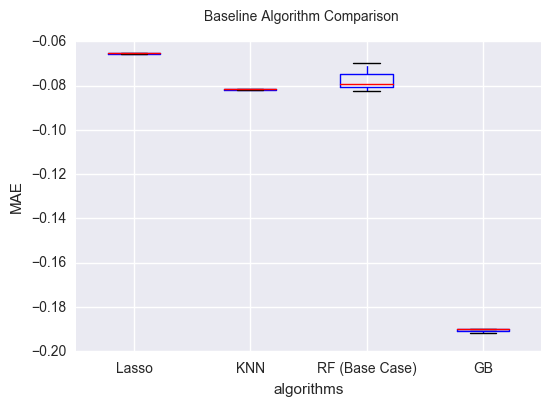

In [157]:
# Compare Algorithms Baseline
fig = plt.figure()
fig.suptitle('Baseline Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_rbm)
ax.set_xticklabels(names_rbm)
plt.ylabel('MAE')
plt.xlabel('algorithms')
plt.show()


### Refinement

In [158]:
#pipeline
num_attribs = list(X_train)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        #('imputer', my_imputer),
        ('std_scaler', scaler),
        ("rbm",rbm)
         ])
X_train_prepared = num_pipeline.fit_transform(X_train, y_train)
X_train_prepared = pd.DataFrame(X_train_prepared)


In [159]:
alphas = [0.8,0.9,0.1,0.11,1,10]
lasso_ridge = [cross_val_score(Lasso(alpha = alpha), X_train_prepared, y_train, cv=kfold, scoring=scoring).mean() 
            for alpha in alphas]

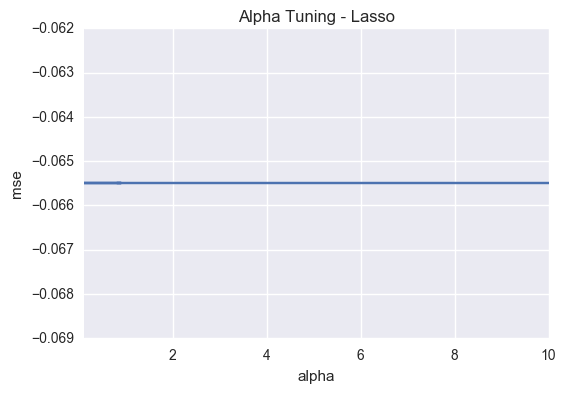

In [160]:
lasso_ridge = pd.Series(lasso_ridge, index = alphas) 
lasso_ridge.plot(title = "Alpha Tuning - Lasso") 
plt.xlabel("alpha") 
plt.ylabel("mse")

In [161]:
lasso_ridge.min()

-0.065495621635786205

In [162]:
# Tune scaled KNN
#neighbors = [1,2,3,4,5,7,8,9,10]
param_grid = dict(n_neighbors=randint(low = 2, high = 10))
rsearch = RandomizedSearchCV(KNN_clf, param_distributions=param_grid, n_iter=4,random_state=7, 
                                      scoring = scoring, cv = kfold)
rsearch_result = rsearch.fit(X_train_prepared, y_train)
print("Best: %f using %s" % (rsearch_result.best_score_, rsearch_result.best_params_))
KNN_clf_tuned = rsearch.best_estimator_

Best: -0.077246 using {'n_neighbors': 9}


In [163]:
#Tune RF

param_grid = {
    'max_depth' : randint(low=1, high=5),
    'min_samples_split': randint(low=2, high=5),
    'n_estimators' : randint(low=100, high=200) }

rsearch = RandomizedSearchCV(RF_clf, param_distributions=param_grid, n_iter=4, cv = kfold, 
                             random_state=7, scoring = scoring)
rsearch_result = rsearch.fit(X_train_prepared.values, y_train)
print(rsearch.best_score_)
print(rsearch.best_estimator_)
print(rsearch.best_params_)

print("Best: %f using %s" % (rsearch_result.best_score_, rsearch_result.best_params_))
RF_clf_tuned = rsearch_result.best_estimator_
#Best: -0.069098 using {u'RF__min_samples_split': 2, u'RF__max_depth': 3, u'RF__n_estimators': 157}

-0.0655672029584
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=1,
           oob_score=False, random_state=7, verbose=0, warm_start=False)
{u'min_samples_split': 4, u'n_estimators': 190, u'max_depth': 3}
Best: -0.065567 using {u'min_samples_split': 4, u'n_estimators': 190, u'max_depth': 3}


In [164]:
# Tune GB - First tune number of Trees
max_depth = [2, 4, 6, 8]
n_estimators = range(50, 400, 50)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

grid_search = GridSearchCV(GB_clf, param_grid, n_jobs=-1, cv=kfold, scoring = scoring)
result = grid_search.fit(X_train_prepared.values, y_train)

Best: -0.065678 using {'n_estimators': 100, 'max_depth': 2}
-0.066017 (0.000338) with: {'n_estimators': 50, 'max_depth': 2}
-0.065678 (0.000307) with: {'n_estimators': 100, 'max_depth': 2}
-0.065728 (0.000296) with: {'n_estimators': 150, 'max_depth': 2}
-0.065773 (0.000293) with: {'n_estimators': 200, 'max_depth': 2}
-0.065817 (0.000288) with: {'n_estimators': 250, 'max_depth': 2}
-0.065840 (0.000291) with: {'n_estimators': 300, 'max_depth': 2}
-0.065889 (0.000304) with: {'n_estimators': 350, 'max_depth': 2}
-0.066105 (0.000323) with: {'n_estimators': 50, 'max_depth': 4}
-0.065852 (0.000293) with: {'n_estimators': 100, 'max_depth': 4}
-0.065985 (0.000277) with: {'n_estimators': 150, 'max_depth': 4}
-0.066108 (0.000279) with: {'n_estimators': 200, 'max_depth': 4}
-0.066220 (0.000257) with: {'n_estimators': 250, 'max_depth': 4}
-0.066334 (0.000256) with: {'n_estimators': 300, 'max_depth': 4}
-0.066425 (0.000216) with: {'n_estimators': 350, 'max_depth': 4}
-0.066268 (0.000269) with: {'n_e

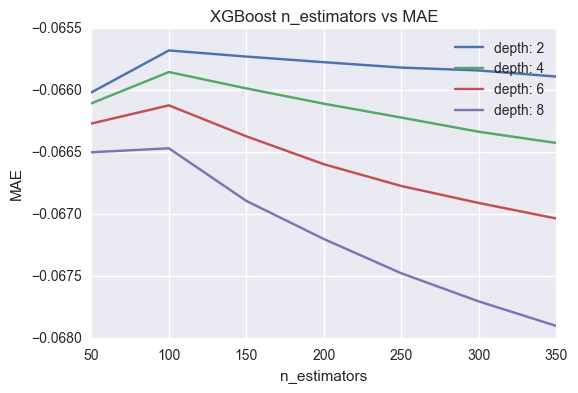

In [165]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.title("XGBoost n_estimators vs MAE")
pyplot.xlabel('n_estimators')
pyplot.ylabel('MAE')
pyplot.savefig('n_estimators_vs_max_depth.png')

In [166]:
# Tune GB - Learning Rate
max_depth = [2]
n_estimators = [50,100,200,300]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate,max_depth=max_depth, n_estimators=n_estimators)

grid_search = GridSearchCV(GB_clf, param_grid, n_jobs=-1, cv=kfold, scoring = scoring)
result = grid_search.fit(X_train_prepared.values, y_train)

Best: -0.065678 using {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 2}
-0.493146 (0.000473) with: {'n_estimators': 50, 'learning_rate': 0.0001, 'max_depth': 2}
-0.490771 (0.000477) with: {'n_estimators': 100, 'learning_rate': 0.0001, 'max_depth': 2}
-0.486059 (0.000483) with: {'n_estimators': 200, 'learning_rate': 0.0001, 'max_depth': 2}
-0.481396 (0.000490) with: {'n_estimators': 300, 'learning_rate': 0.0001, 'max_depth': 2}
-0.472203 (0.000503) with: {'n_estimators': 50, 'learning_rate': 0.001, 'max_depth': 2}
-0.450047 (0.000537) with: {'n_estimators': 100, 'learning_rate': 0.001, 'max_depth': 2}
-0.409026 (0.000604) with: {'n_estimators': 200, 'learning_rate': 0.001, 'max_depth': 2}
-0.372059 (0.000662) with: {'n_estimators': 300, 'learning_rate': 0.001, 'max_depth': 2}
-0.308134 (0.000732) with: {'n_estimators': 50, 'learning_rate': 0.01, 'max_depth': 2}
-0.198098 (0.000804) with: {'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 2}
-0.100146 (0.000692) with: {'

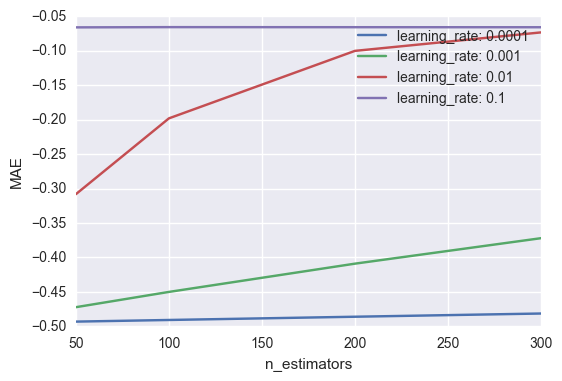

In [167]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('MAE')
pyplot.savefig('n_estimators_vs_learning_rate.png')

In [168]:
# Tune GB - Subsample
max_depth = [2]
n_estimators = [100]
learning_rate = [0.1]
subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0]
param_grid = dict(learning_rate=learning_rate,max_depth=max_depth, n_estimators=n_estimators, subsample = subsample)

grid_search = GridSearchCV(GB_clf, param_grid, n_jobs=-1, cv=kfold, scoring = scoring)
result = grid_search.fit(X_train_prepared.values, y_train)

Best: -0.065678 using {'n_estimators': 100, 'subsample': 1.0, 'learning_rate': 0.1, 'max_depth': 2}
-0.066120 (0.000207) with: {'n_estimators': 100, 'subsample': 0.1, 'learning_rate': 0.1, 'max_depth': 2}
-0.065837 (0.000269) with: {'n_estimators': 100, 'subsample': 0.2, 'learning_rate': 0.1, 'max_depth': 2}
-0.065806 (0.000301) with: {'n_estimators': 100, 'subsample': 0.3, 'learning_rate': 0.1, 'max_depth': 2}
-0.065777 (0.000268) with: {'n_estimators': 100, 'subsample': 0.4, 'learning_rate': 0.1, 'max_depth': 2}
-0.065763 (0.000287) with: {'n_estimators': 100, 'subsample': 0.5, 'learning_rate': 0.1, 'max_depth': 2}
-0.065736 (0.000304) with: {'n_estimators': 100, 'subsample': 0.6, 'learning_rate': 0.1, 'max_depth': 2}
-0.065710 (0.000297) with: {'n_estimators': 100, 'subsample': 0.7, 'learning_rate': 0.1, 'max_depth': 2}
-0.065692 (0.000294) with: {'n_estimators': 100, 'subsample': 0.8, 'learning_rate': 0.1, 'max_depth': 2}
-0.065690 (0.000302) with: {'n_estimators': 100, 'subsample'

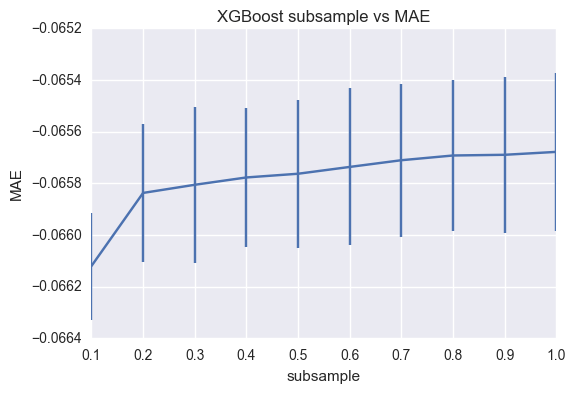

In [169]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
pyplot.errorbar(subsample, means, yerr=stds)
pyplot.title("XGBoost subsample vs MAE")
pyplot.xlabel('subsample')
pyplot.ylabel('MAE')
pyplot.savefig('subsample.png')

In [170]:
#Best: -0.068935 using {'n_estimators': 100, 'subsample': 1, 'learning_rate': 0.1, 'max_depth': 2, 'colsample_bylevel': 0.2}
GB_clf_tuned = XGBRegressor(n_estimators = 100, subsample= 1, learning_rate = 0.1, max_depth= 2)

In [171]:
# tuned models
pipelines = []
pipelines.append(('Lasso Tuned', Pipeline([('Scaler', scaler),("rbm",rbm),('Lasso',LASSO_clf)])))
pipelines.append(('KNN Tuned', Pipeline([('Scaler', scaler),("rbm",rbm),('KNN',KNN_clf_tuned )])))
pipelines.append(('RF Tuned', Pipeline([('Scaler', scaler),("rbm",rbm),('RF',RF_clf_tuned)])))
pipelines.append(('GB Tuned', Pipeline([('Scaler', scaler),("rbm",rbm),('GB', GB_clf_tuned)])))


for name, model in pipelines:
    cv_results = cross_val_score(model, X_train.values, y_train, cv=kfold, scoring=scoring)
    results_rbm.append(cv_results)
    names_rbm.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Lasso Tuned: -0.065496 (0.000328)
KNN Tuned: -0.076842 (0.000329)
RF Tuned: -0.065599 (0.000311)
GB Tuned: -0.065689 (0.000337)


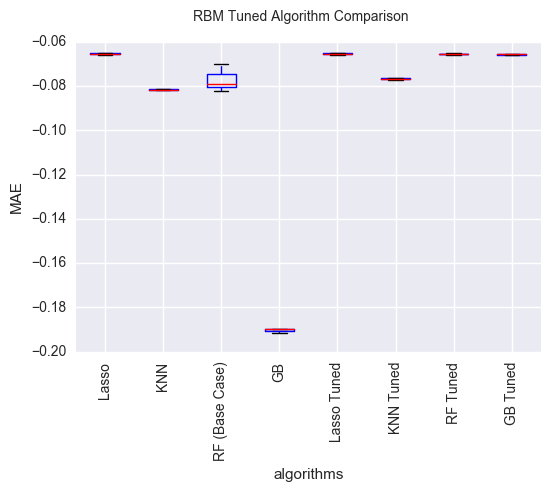

In [172]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('RBM Tuned Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_rbm)
ax.set_xticklabels(names_rbm)
plt.ylabel('MAE')
plt.xlabel('algorithms')
plt.xticks(rotation=90)
plt.show()

## IV. Results

### Model Evaluation and Validation

In [173]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


In [174]:
stack_clf = StackingRegressor(regressors=[GB_clf_tuned, RF_clf_tuned], 
                           meta_regressor=LASSO_clf)

<module 'matplotlib.pyplot' from 'C:\Users\203014767\.conda\envs\DAND\lib\site-packages\matplotlib\pyplot.pyc'>

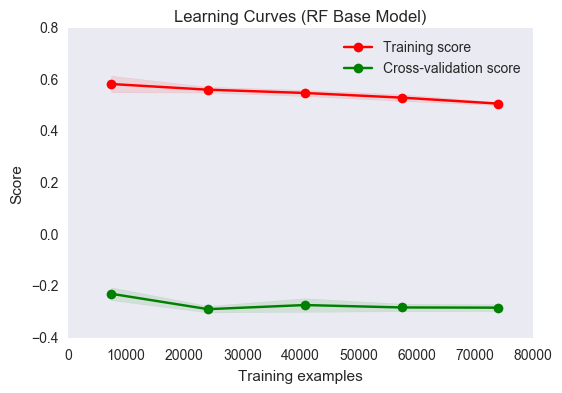

In [175]:
title = "Learning Curves (RF Base Model)"
plot_learning_curve(RF_clf, title, X_train_prepared.values, y_train, cv=kfold)

<module 'matplotlib.pyplot' from 'C:\Users\203014767\.conda\envs\DAND\lib\site-packages\matplotlib\pyplot.pyc'>

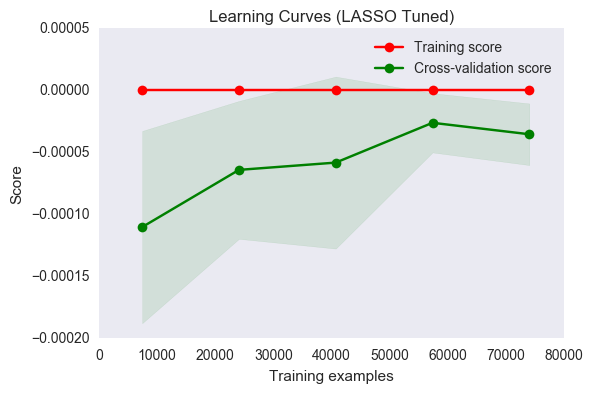

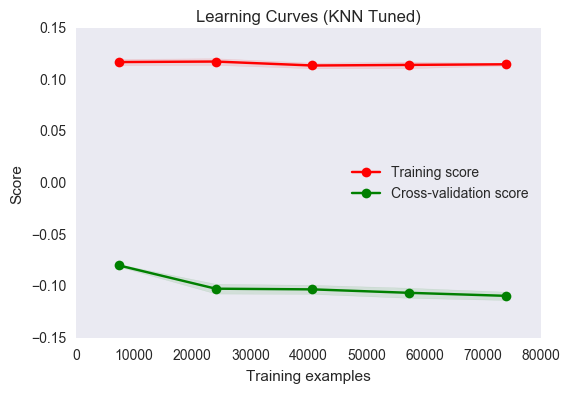

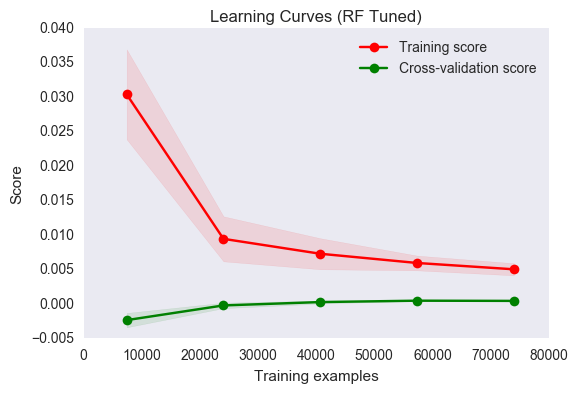

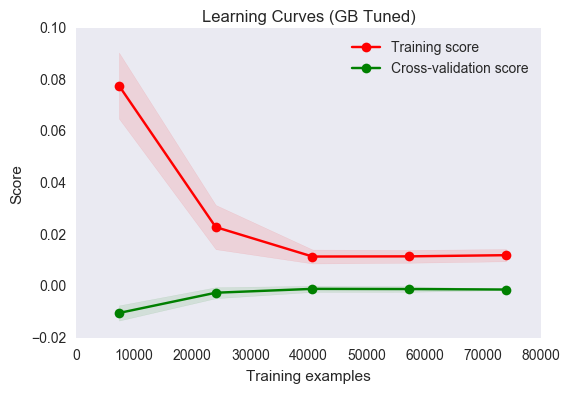

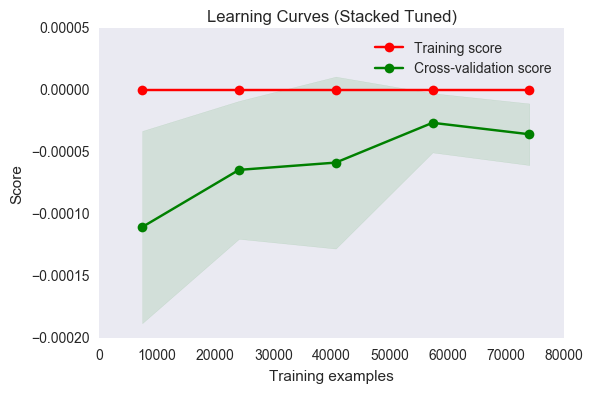

In [176]:
title = "Learning Curves (LASSO Tuned)"
plot_learning_curve(LASSO_clf, title, X_train_prepared.values, y_train, cv=kfold)

title = "Learning Curves (KNN Tuned)"
plot_learning_curve(KNN_clf_tuned, title, X_train_prepared.values, y_train, cv=kfold)

title = "Learning Curves (RF Tuned)"
plot_learning_curve(RF_clf_tuned, title, X_train_prepared.values, y_train, cv=kfold)

title = "Learning Curves (GB Tuned)"
plot_learning_curve(GB_clf_tuned, title, X_train_prepared.values, y_train, cv=kfold)

title = "Learning Curves (Stacked Tuned)"
plot_learning_curve(stack_clf, title, X_train_prepared.values, y_train, cv=kfold)

### Final Predictions

In [177]:
X_test_prepared = num_pipeline.transform(X_test[num_attribs])

In [178]:
RF_clf.fit(X_train_prepared, y_train)
pred = RF_clf.predict(X_test_prepared)
MAE_test = mean_absolute_error(pred, y_test)

print ("Baseline Model (MAE Test): {}".format(MAE_test))

Baseline Model (MAE Test): 0.0833391462064


In [179]:
LASSO_clf.fit(X_train_prepared, y_train)
pred = LASSO_clf.predict(X_test_prepared)
MAE_test = mean_absolute_error(pred, y_test)

print ("LASSO (MAE Test): {}".format(MAE_test))

LASSO (MAE Test): 0.0667227196034


In [180]:
RF_clf_tuned.fit(X_train_prepared, y_train)
pred = RF_clf_tuned.predict(X_test_prepared)
MAE_test = mean_absolute_error(pred, y_test)

print ("RF Tuned (MAE Test): {}".format(MAE_test))

RF Tuned (MAE Test): 0.0668000127777


In [181]:
GB_clf_tuned.fit(X_train_prepared.values, y_train)
pred = GB_clf_tuned.predict(X_test_prepared)
MAE_test = mean_absolute_error(pred, y_test)

print ("GB Tuned (MAE Test): {}".format(MAE_test))

GB Tuned (MAE Test): 0.0668557619413


In [182]:
stack_clf.fit(X_train_prepared.values, y_train)
pred = stack_clf.predict(X_test_prepared)
MAE_test = mean_absolute_error(pred, y_test)

print ("Stack (MAE Test): {}".format(MAE_test))

Stack (MAE Test): 0.0667227196034


In [183]:
num_attribs = list(X_train)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', my_imputer),
        ('std_scaler', scaler),
        ("rbm",rbm)
         ])

In [184]:
# Run final predictions
final_pipeline = Pipeline([
    ('preparation', num_pipeline),
    ('reg', stack_clf)
])


In [185]:
final_model = final_pipeline.fit(X_train, y_train)

In [186]:
test_df_final = test_df[RF_columns]

In [187]:
test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985217 entries, 0 to 2985216
Data columns (total 26 columns):
bathroomcnt                              float64
bedroomcnt                               float64
calculatedbathnbr                        float64
fullbathcnt                              float64
roomcnt                                  float64
structuretaxvaluedollarcnt               float64
taxvaluedollarcnt                        float64
landtaxvaluedollarcnt                    float64
taxamount                                float64
total_square_footage                     float64
propertylandusetypeid_246.0              uint8
propertylandusetypeid_247.0              uint8
propertylandusetypeid_248.0              uint8
propertylandusetypeid_260.0              uint8
propertylandusetypeid_261.0              uint8
propertylandusetypeid_266.0              uint8
propertylandusetypeid_269.0              uint8
propertylandusetypeid_31.0               uint8
quantile_bin_region_F

In [188]:
# Run final predictions
pred_final = final_model.predict(test_df_final)

In [189]:
print(len(test_df_final))

2985217


In [190]:
len(pred_final)

2985217

In [191]:
from datetime import datetime

In [192]:
submission_file = pd.read_csv('sample_submission.csv') 

In [193]:
for column in submission_file.columns[submission_file.columns != 'ParcelId']:
    submission_file[column] = pred_final

In [194]:
submission_file.to_csv('RF_final_predictions.csv', index=False, float_format='%.4f')